### 最小二乘法的局限性


最小二乘法的公式解为： w = np.linalg.inv((np.matrix(x).T * np.matrix(x))) * np.matrix(x).T * y

A = np.matrix(x).T * np.matrix(x)

公式成立的条件就是A不能为 0。

当遇到以下两种情况：

- 数据集的列（特征）数量 > 数据量（行数量），即 X不是列满秩。

- 数据集列（特征）数据之间存在较强的线性相关性，即模型容易出现过拟合。

A的结果趋近于 0，造成拟合参数的数值不稳定性增加，这也就是普通最小二乘法的局限。



## 岭回归
岭回归可以被看作为一种改良后的最小二乘估计法，它通过向损失函数中添加 L2正则项（2-范数）有效防止模型出现过拟合，且以助于解决非满秩条件下求逆困难的问题，从而提升模型的解释能力。

更新后的解析解为： w = np.inv(X * X.T + lamda * I) * X.T *y
可以看出，通过给A增加一个单位矩阵，从而使得矩阵变成满秩，完善普通最小二乘法的不足。

## 岭回归

sklearn.linear_model.Ridge(alpha=1.0, fit_intercept=True, normalize=False, copy_X=True, max_iter=None, tol=0.001, solver='auto', random_state=None)

    alpha: 正则化强度，默认为 1.0，对应公式 8 中的 lamda

    fit_intercept: 默认为 True，计算截距项。

    normalize: 默认为 False，不针对数据进行标准化处理。

    copy_X: 默认为 True，即使用数据的副本进行操作，防止影响原数据。

    max_iter: 最大迭代次数，默认为 None。

    tol: 数据解算精度。

    solver: 根据数据类型自动选择求解器。

    random_state: 随机数发生器。

In [1]:
from sklearn.linear_model import Ridge
from scipy.optimize import leastsq
from scipy.linalg import hilbert
import numpy as np

x = hilbert(10)  # 生成 10x10 的希尔伯特矩阵
np.random.seed(10)  # 随机数种子能保证每次生成的随机数一致
w = np.random.randint(2, 10, 10)  # 随机生成 w 系数
y_temp = np.matrix(x) * np.matrix(w).T  # 计算 y 值
y = np.array(y_temp.T)[0]  # 将 y 值转换成 1 维行向量

print("实际参数 w: ", w)
print("实际函数值 y: ", y)


ridge_model = Ridge(fit_intercept=False)  # 参数代表不增加截距项
ridge_model.fit(x, y)

ridge_model.coef_  # 打印模型参数



实际参数 w:  [3 7 6 9 2 3 5 6 3 7]
实际函数值 y:  [14.14761905 10.1232684   8.12233045  6.8529637   5.95634643  5.28188478
  4.75274309  4.32480306  3.97061256  3.67205737]


array([6.3497497 , 4.32792068, 3.40228975, 2.83692059, 2.44632895,
       2.15683095, 1.93213214, 1.75189668, 1.60369747, 1.47944808])

In [2]:
# 普通最小二乘法
func = lambda p, x: np.dot(x, p)  # 函数公式
err_func = lambda p, x, y: func(p, x) - y  # 残差函数
p_init = np.random.randint(1, 2, 10)  # 全部参数初始化为 1

parameters = leastsq(err_func, p_init, args=(x, y))  # 最小二乘法求解
print("拟合参数 w: ", parameters[0])

拟合参数 w:  [  3.00317552   6.84694891   7.80922602   0.11787948  23.84530017
 -26.56612176  30.04685297 -11.87888984  14.59294259   3.18066383]


Text(0.5, 1.0, 'Ridge Regression')

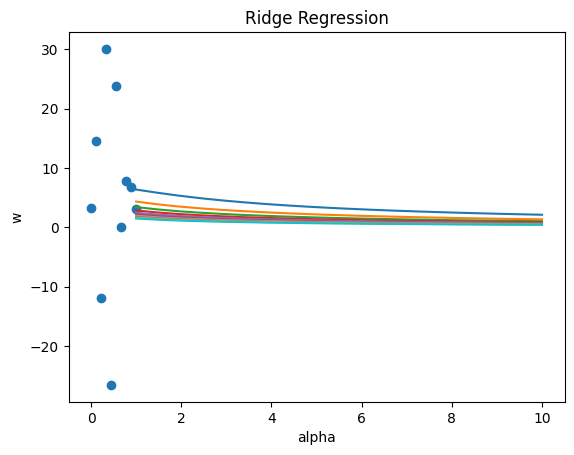

In [3]:
"""不同 alpha 参数拟合
"""
alphas = np.linspace(1, 10, 20)

coefs = []
for a in alphas:
    ridge = Ridge(alpha=a, fit_intercept=False)
    ridge.fit(x, y)
    coefs.append(ridge.coef_)


"""绘制不同 alpha 参数结果
"""
from matplotlib import pyplot as plt

%matplotlib inline

plt.plot(alphas, coefs)  # 绘制不同 alpha 参数下的 w 拟合值
plt.scatter(np.linspace(1, 0, 10), parameters[0])  # 普通最小二乘法拟合的 w 值放入图中
plt.xlabel("alpha")
plt.ylabel("w")
plt.title("Ridge Regression")

由图可见，当 alpha 取值越大时，正则项主导收敛过程，各 w 系数趋近于 0。当 alpha 很小时，各 w 系数波动幅度变大。

## LASSO 回归
LASSO 回归同样是通过添加正则项来改进普通最小二乘法，不过这里添加的是 L1 正则项。

sklearn.linear_model.Lasso(alpha=1.0, fit_intercept=True, normalize=False, precompute=False, copy_X=True, max_iter=1000, tol=0.0001, warm_start=False, positive=False, random_state=None, selection='cyclic')

alpha: 正则化强度，默认为 1.0。

fit_intercept: 默认为 True，计算截距项。

normalize: 默认为 False，不针对数据进行标准化处理。

precompute: 是否使用预先计算的 Gram 矩阵来加速计算。

copy_X: 默认为 True，即使用数据的副本进行操作，防止影响原数据。

max_iter: 最大迭代次数，默认为 1000。

tol: 数据解算精度。

warm_start: 重用先前调用的解决方案以适合初始化。

positive: 强制系数为正值。

random_state: 随机数发生器。

selection: 每次迭代都会更新一个随机系数。

Text(0.5, 1.0, 'Lasso Regression')

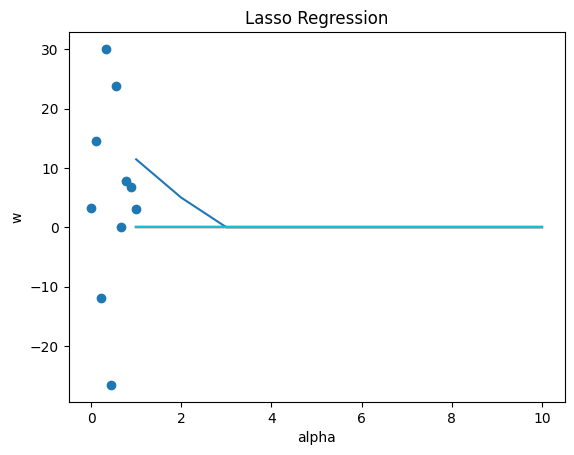

In [4]:
"""使用 LASSO 回归拟合并绘图
"""
from sklearn.linear_model import Lasso

alphas = np.linspace(1, 10, 10)
lasso_coefs = []

for a in alphas:
    lasso = Lasso(alpha=a, fit_intercept=False)
    lasso.fit(x, y)
    lasso_coefs.append(lasso.coef_)

plt.plot(alphas, lasso_coefs)  # 绘制不同 alpha 参数下的 w 拟合值
plt.scatter(np.linspace(1, 0, 10), parameters[0])  # 普通最小二乘法拟合的 w 值放入图中
plt.xlabel("alpha")
plt.ylabel("w")
plt.title("Lasso Regression")